In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas_profiling as pp

## reading the dataset

In [2]:
df = pd.read_csv('data.csv', delimiter = ';')
#df.dropna(subset=['shot_made_flag'])
df = df[df['shot_made_flag'].notnull()]
df.sample(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
25569,Jump Shot,Jump Shot,164,49900072,338.633,-111,181,-1.183.808,5,2,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,28-5-2000,LAL @ POR,POR,25570
11624,Turnaround Jump Shot,Jump Shot,6,20800562,339.703,42,74,-1.182.278,10,1,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,13-1-2009,LAL @ HOU,HOU,11625
19238,Jump Shot,Jump Shot,304,29600126,338.893,-170,155,-1.184.398,0,3,...,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,17-11-1996,LAL @ PHX,PHX,19239
20554,Jump Shot,Jump Shot,399,29800239,339.383,74,106,-1.181.958,9,4,...,2PT Field Goal,Right Side(R),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,7-3-1999,LAL @ UTA,UTA,20555
20174,Jump Shot,Jump Shot,236,29700981,340.323,121,12,-1.181.488,0,2,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,22-3-1998,LAL @ SAC,SAC,20175


In [3]:
df.shape

(21197, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 25696
Data columns (total 25 columns):
action_type           21197 non-null object
combined_shot_type    21197 non-null object
game_event_id         21197 non-null int64
game_id               21197 non-null int64
lat                   21197 non-null float64
loc_x                 21197 non-null int64
loc_y                 21197 non-null int64
lon                   21197 non-null object
minutes_remaining     21197 non-null int64
period                21197 non-null int64
playoffs              21197 non-null int64
season                21197 non-null object
seconds_remaining     21197 non-null int64
shot_distance         21197 non-null int64
shot_made_flag        21197 non-null float64
shot_type             21197 non-null object
shot_zone_area        21197 non-null object
shot_zone_basic       21197 non-null object
shot_zone_range       21197 non-null object
team_id               21197 non-null int64
team_name          

## making a report of the original dataset

In [5]:
pp.ProfileReport(df).to_file('report.html')

## change game_date into datetime

In [6]:
df["game_date"] = pd.to_datetime(df["game_date"], format="%d-%m-%Y")

## create a X and y dataframe

In [7]:
y = df['shot_made_flag']

In [8]:
#X = df.drop(['shot_made_flag'], axis=1)
#df.select_dtypes(include=['int, float'])
#df.drop(['shot_made_flag', ], axis=1)
X = df.select_dtypes(exclude=["object"]).drop(['shot_made_flag', 'game_date'], axis=1)

# create a base model

In [9]:
! pip install sklearn

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
forest = RandomForestClassifier()

In [14]:
forest.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predict = forest.predict(X_test)
predict

array([0., 0., 0., ..., 1., 1., 0.])

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, roc_auc_score

In [27]:
confusion_matrix(y_test, predict)

array([[2513, 1021],
       [1846,  980]])

In [28]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.58      0.71      0.64      3534
         1.0       0.49      0.35      0.41      2826

   micro avg       0.55      0.55      0.55      6360
   macro avg       0.53      0.53      0.52      6360
weighted avg       0.54      0.55      0.53      6360



In [29]:
print(log_loss(y_test, predict))

15.569730866853009


In [41]:
predict_B = forest.predict_proba(X_test)[:, 1]
predict_A = forest.predict_proba(X_test)

In [31]:
roc_auc_score(y_test, predict_B)

0.5501795118575152

In [35]:
!pip install scikit-plot

    100% |████████████████████████████████| 286kB 52.7MB/s ta 0:00:01


In [36]:
import matplotlib.pyplot as plt
import scikitplot as skplt

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


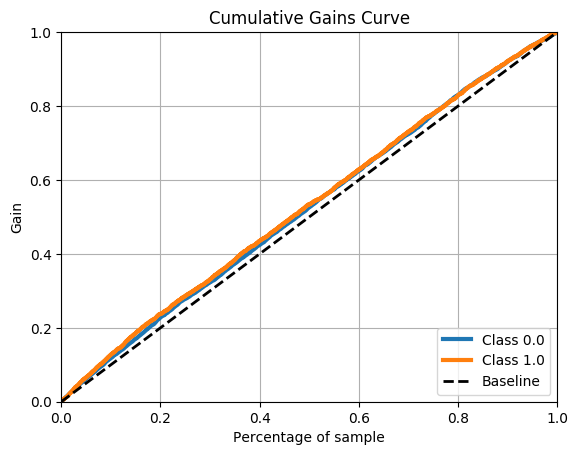

In [42]:
skplt.metrics.plot_cumulative_gain(y_test, predict_A)
plt.show()